In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

"""

https://www.consumerfinance.gov/data-research/mortgage-performance-trends/download-the-data/
"""


# MAE, MSE, RMSE, RMSLE

'\n\nhttps://www.consumerfinance.gov/data-research/mortgage-performance-trends/download-the-data/\n'

In [60]:
df1 = pd.read_csv('CountyMortgagesPercent-90-plusDaysLate-thru-2020-06.csv')
df2 = pd.read_csv('CountyMortgagesPercent-30-89DaysLate-thru-2020-06.csv')

In [61]:
df1.shape

(471, 154)

In [62]:
df1 = pd.melt(df1, id_vars=['RegionType','State','Name','FIPSCode']) 
df1.head()

,RegionType,State,Name,FIPSCode,variable,value
0,National,NaN,United States,-----,2008-01,1.5
1,County,AL,Baldwin County,'01003',2008-01,1.3
2,County,AL,Jefferson County,'01073',2008-01,2.1
3,County,AL,Lee County,'01081',2008-01,1.4
4,County,AL,Madison County,'01089',2008-01,0.8


In [63]:
df2 = pd.melt(df2, id_vars=['RegionType','State','Name','FIPSCode']) 
df2.head()

,RegionType,State,Name,FIPSCode,variable,value
0,National,NaN,United States,-----,2008-01,3.5
1,County,AL,Baldwin County,'01003',2008-01,2.8
2,County,AL,Jefferson County,'01073',2008-01,5.1
3,County,AL,Lee County,'01081',2008-01,3.8
4,County,AL,Madison County,'01089',2008-01,3.5


In [64]:
df1 = df1.rename(columns={'variable':'Date','value':'Value'})

In [65]:
 df1['Date'] = df1['Date'].astype('datetime64[ns]')

In [66]:
df1[['State']]=df1[['State']].replace(np.nan, 'US', regex=True)

In [67]:
df1.dtypes

RegionType            object
State                 object
Name                  object
FIPSCode              object
Date          datetime64[ns]
Value                float64
dtype: object

In [68]:
st = df1[(df1['Name']=='United States') | (df1['State']=='FL')]
st

,RegionType,State,Name,FIPSCode,Date,Value
0,National,US,United States,-----,2008-01-01,1.5
73,County,FL,Alachua County,'12001',2008-01-01,1.5
74,County,FL,Bay County,'12005',2008-01-01,1.5
75,County,FL,Brevard County,'12009',2008-01-01,2.1
76,County,FL,Broward County,'12011',2008-01-01,3.2
...,...,...,...,...,...,...
70279,County,FL,St. Lucie County,'12111',2020-06-01,0.8
70280,County,FL,Santa Rosa County,'12113',2020-06-01,0.6
70281,County,FL,Sarasota County,'12115',2020-06-01,0.4
70282,County,FL,Seminole County,'12117',2020-06-01,0.4


In [69]:
st

,RegionType,State,Name,FIPSCode,Date,Value
0,National,US,United States,-----,2008-01-01,1.5
73,County,FL,Alachua County,'12001',2008-01-01,1.5
74,County,FL,Bay County,'12005',2008-01-01,1.5
75,County,FL,Brevard County,'12009',2008-01-01,2.1
76,County,FL,Broward County,'12011',2008-01-01,3.2
...,...,...,...,...,...,...
70279,County,FL,St. Lucie County,'12111',2020-06-01,0.8
70280,County,FL,Santa Rosa County,'12113',2020-06-01,0.6
70281,County,FL,Sarasota County,'12115',2020-06-01,0.4
70282,County,FL,Seminole County,'12117',2020-06-01,0.4


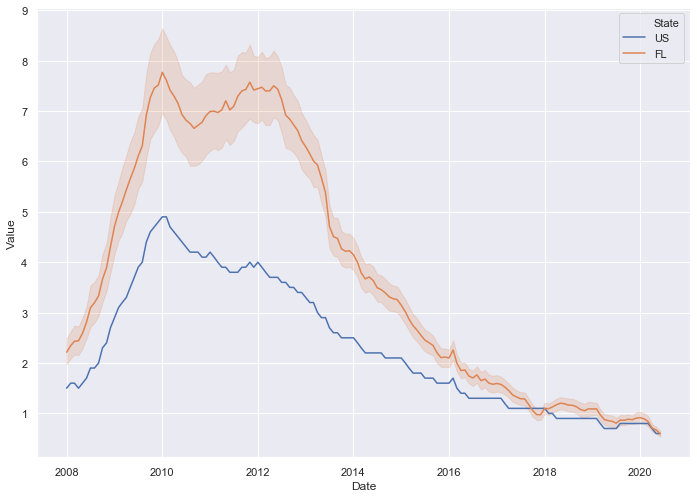

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='Date',y='Value',hue='State',data=st)

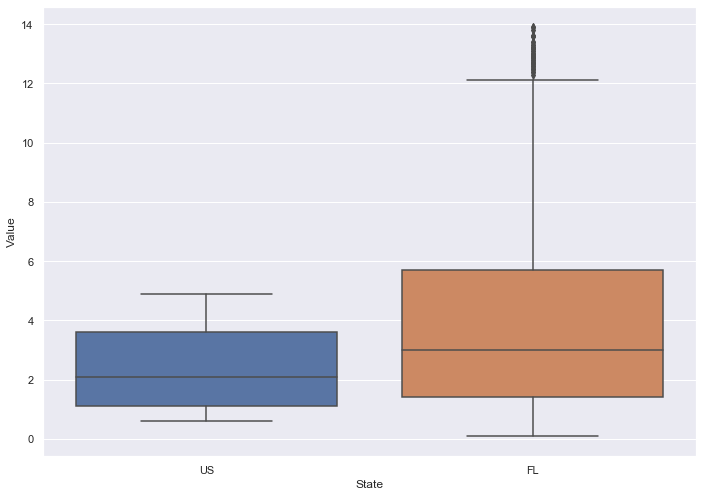

In [71]:
sns.boxplot(x='State',y='Value',data=st)

In [72]:
st2 = df1[(df1['Name']=='Miami-Dade County') | (df1['Name']=='Broward County')]

In [73]:
st2

,RegionType,State,Name,FIPSCode,Date,Value
76,County,FL,Broward County,'12011',2008-01-01,3.2
91,County,FL,Miami-Dade County,'12086',2008-01-01,3.0
547,County,FL,Broward County,'12011',2008-02-01,3.3
562,County,FL,Miami-Dade County,'12086',2008-02-01,3.3
1018,County,FL,Broward County,'12011',2008-03-01,3.4
...,...,...,...,...,...,...
69328,County,FL,Miami-Dade County,'12086',2020-04-01,0.8
69784,County,FL,Broward County,'12011',2020-05-01,0.9
69799,County,FL,Miami-Dade County,'12086',2020-05-01,0.7
70255,County,FL,Broward County,'12011',2020-06-01,0.8


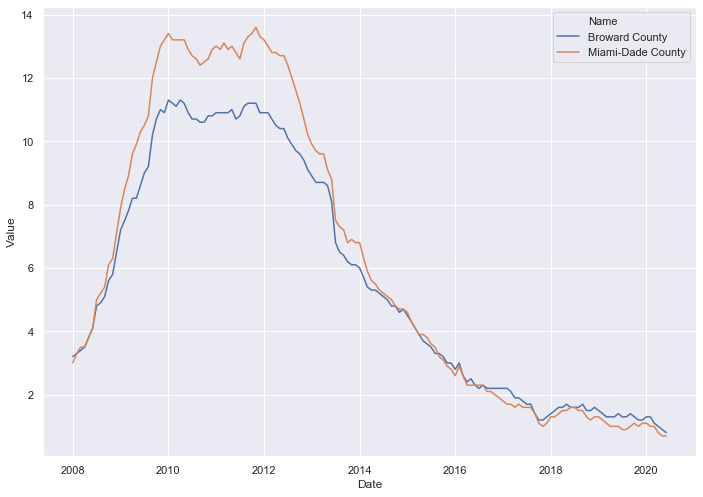

In [74]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='Date',y='Value',hue='Name',data=st2)

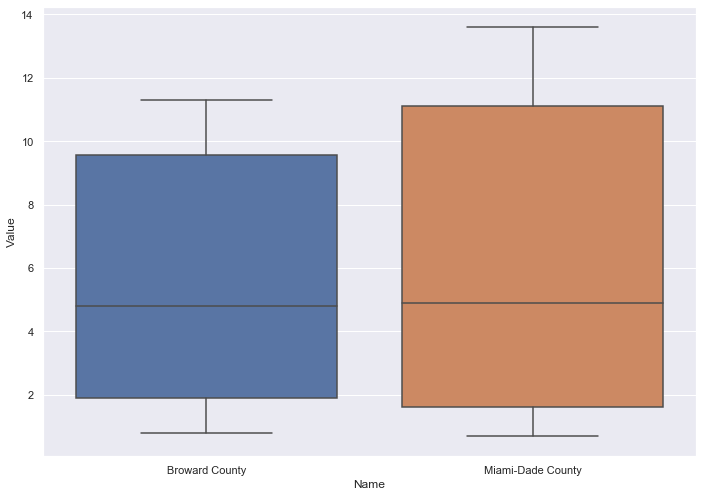

In [75]:
sns.boxplot(x='Name',y='Value',data=st2)

In [77]:
#stationary - when the mean is constant, 
#the sd is constant, and there CANNOT be seasonality (repeating patterns - no periodic behavior)

#* if a condition is white noise, we know it is also stationary
#but just because it is statioonary, doesnt mean it is white noise


#testing for stationary - there are 3 ways
#visually
#global vs local tests - when the local mean/sd is not the same as the global mean
#augmented dickey fueller test (ADF)  statistical way of telling if something is stationary



